# DsgvoAssistant evaluation
The DsgvoAssistant in the Kotlin project detects which part of a websites html belongs to Dsgvo related content. By looking at the cleaned htmls and the removed readable text here we try to judge whether it finds the right passages.
### The data
One of the tests in the Kotlin projects appends the test set of 50 websites with the cleaned html and the removed readable text. Here we load this extended test set

In [21]:
import pandas as pd
import json
import re
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

In [22]:
json_file = open("/home/erik/Desktop/WiSe2022_23/IR-Project/dsgvo_handler/IR_Kotlin_Proj_evaluation/processed_test_set_v2_2.json")
json_str = json_file.read()
json_data = json.loads(json_str)

df = pd.DataFrame(json_data['rows'])

## Metrics

In [23]:
labels = [1 if x else 0 for x in df["contains_GDPR"].values]
print(f"Positive samples: {len(list(filter(lambda x: x==1, labels)))}")
predictions = [0 if x=="" else 1 for x in df["content_removed_assistant"].values]
acc = accuracy_score(labels, predictions)
conf_matrix = confusion_matrix(labels, predictions)
print(f"Accuracy: {acc}")
print("Confusion matrix:")
print(conf_matrix)
print(f"tn:{conf_matrix[0][0]}, fp:{conf_matrix[0][1]}, tp:{conf_matrix[1][1]}, fn:{conf_matrix[1][0]}")

Positive samples: 29
Accuracy: 0.98
Confusion matrix:
[[21  0]
 [ 1 28]]
tn:21, fp:0, tp:28, fn:1


### Compare what was removed manually and what was removed by the assistant

In [4]:
def getTokenCount(text):
    if type(text) != str:
        return 0
    return len(re.findall(r'\w+', text))

manually_removed = []
assistant_removed = []
errors = []
errors_rel = []

for i in range(0, len(df)):
    manual_removed_count = getTokenCount(df.iloc[i]['content_removed'])
    manually_removed.append(manual_removed_count)
    assistant_removed_count = getTokenCount(df.iloc[i]['content_removed_assistant'])
    assistant_removed.append(assistant_removed_count)

    error = abs(manual_removed_count - assistant_removed_count)
    errors.append(error)
    if manual_removed_count != 0 and error != 0:
        errors_rel.append(error/manual_removed_count)
    elif manual_removed_count == 0 and error == 0:
        errors_rel.append(0.0)
    elif manual_removed_count == 0 and error != 0:
        errors_rel.append(1.0)
    elif manual_removed_count != 0 and error == 0:
        errors_rel.append(error/manual_removed_count)

df['manual_removed_count'] = manually_removed
df['assistant_removed_count'] = assistant_removed

df['content_removed_error'] = errors
df['content_removed_error_rel'] = errors_rel

In [5]:
df = df.sort_values("contains_GDPR")

In [6]:
df.to_json("/home/erik/Desktop/WiSe2022_23/IR-Project/dsgvo_handler/IR_Kotlin_Proj_evaluation/evaluated_test_set_v2_2.json")

### Overview and stats

<Figure size 4800x3600 with 0 Axes>

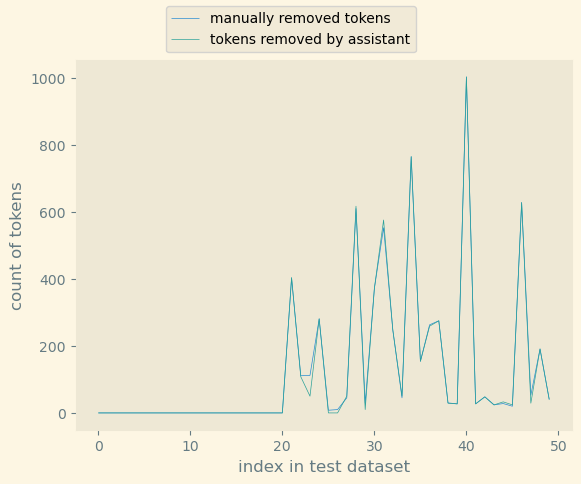

In [17]:
plt.figure(figsize=(16, 12), dpi=300)
plt.style.use('Solarize_Light2')

fig, ax = plt.subplots(1)

labels = ["manually removed tokens", "tokens removed by assistant", "error as difference between the first two", "error in relation length of manually removed "]
index = list(range(0,50))

ax.plot(df["manual_removed_count"].values, label=labels[0], linewidth=0.5)
ax.plot(df["assistant_removed_count"].values, label=labels[1], linewidth=0.5)
#ax.plot(df["content_removed_error"].values, label=labels[2])
#ax.plot([ x * 100 for x in df["content_removed_error_rel"].values], label=labels[3])
plt.xlabel("index in test dataset")
plt.ylabel("count of tokens")

fig.legend(loc='upper center')
plt.grid()

plt.savefig("/home/erik/Desktop/WiSe2022_23/IR-Project/dsgvo_handler/IR_Kotlin_Proj_evaluation/dsgvo_assistant_evaluation.png", dpi=300)

<Figure size 4800x3600 with 0 Axes>

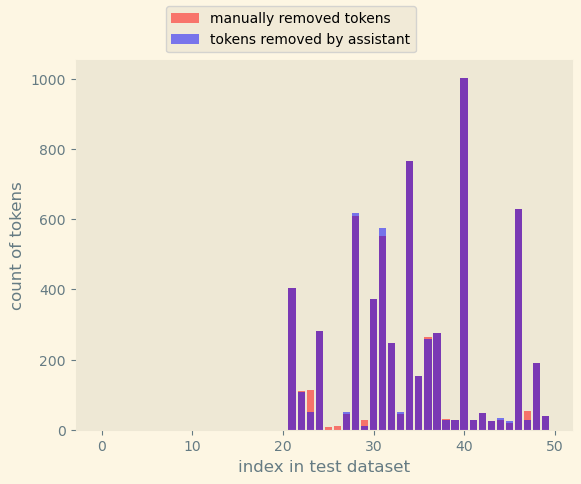

In [20]:
plt.figure(figsize=(16, 12), dpi=300)
plt.style.use('Solarize_Light2')

fig, ax = plt.subplots(1)

labels = ["manually removed tokens", "tokens removed by assistant", "error as difference between the first two", "error in relation length of manually removed "]
index = list(range(0,50))
plt.bar(index, df["manual_removed_count"].values, color="r", alpha=.5, label=labels[0])
plt.bar(index, df["assistant_removed_count"].values, color="b", alpha=.5, label=labels[1])
#ax.plot(df["manual_removed_count"].values, label=labels[0], linewidth=0.5)
#ax.plot(df["assistant_removed_count"].values, label=labels[1], linewidth=0.5)
#ax.plot(df["content_removed_error"].values, label=labels[2])
#ax.plot([ x * 100 for x in df["content_removed_error_rel"].values], label=labels[3])
plt.xlabel("index in test dataset")
plt.ylabel("count of tokens")

fig.legend(loc='upper center')
plt.grid()

plt.savefig("/home/erik/Desktop/WiSe2022_23/IR-Project/dsgvo_handler/IR_Kotlin_Proj_evaluation/dsgvo_assistant_evaluation_bar.png", dpi=300)

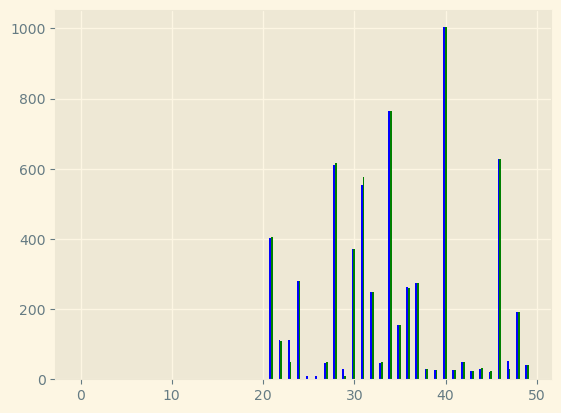

In [15]:
index = list(range(0,50))

y_manually = df["manual_removed_count"].values
y_assistant = df["assistant_removed_count"].values


ax = plt.subplot(111)
ax.bar([x-0.2 for x in index], y_manually, width=0.2, color='b', align='center')
ax.bar(index, y_assistant, width=0.2, color='g', align='center')

plt.show()

TypeError: can only concatenate list (not "float") to list

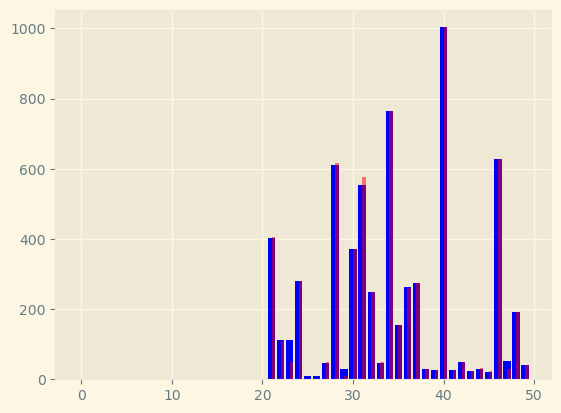

In [16]:
width = 0.8

highPower   = df["manual_removed_count"].values
              
lowPower    = df["assistant_removed_count"].values

indices = list(range(0,50))

plt.bar(indices, highPower, width=width,
        color='b', label='Max Power in mW')
plt.bar([i+0.25*width for i in indices], lowPower,
        width=0.5*width, color='r', alpha=0.5, label='Min Power in mW')

plt.xticks(indices+width/2.,
           ['T{}'.format(i) for i in range(len(highPower))] )

plt.legend()

plt.show()